# Evaluating classifiers

In this section, you will learn how to evaluate a classifier's performance. For this purpose, we will first implement logistic regression on a real world data.

## Imports

In [ ]:
import itertools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Pima Indians Diabetes Dataset
  
So we just implemented the logistic regression on a small synthetic dataset. But that is rarely the case in reality. Real-world datasets are huge in size with a large number of examples and features.

To give you a taste of how logistic regression solves the classification problem in the real world, we will be implementing logistic regression on the [Pima Indian Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. We need to predict if a patient has diabetes or not, based on certain diagnostic measurements included in the dataset. This is a subset of a larger database. It contains only the samples of the patients who are females and at least 21 years old of Pima Indian heritage.

As we did earlier, we are going to use Scikit-Learn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object to classify the patient.

### Dataset Description

The dataset has Number 768 sample records of patients. There are 8 features:


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction
- Age: Years

Using these 8 predictor variables we need to predict the target variable 'Outcome'. It contains binary value: 1 if the patient has diabetes and 0 if the patient doesn't have diabetes.





### Importing the dataset

Let's import the dataset first and have a quick look at it.

In [ ]:
dataset = pd.read_csv('https://storage.googleapis.com/codehub-data/1-lv1-2-diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Understanding the data distribution

We can get some statistical information about each of the columns of dataset using `dataset.describe()`

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


You can clearly see the range of values differ very much from one column to the other. The value of the `DiabetesPedigreeFunction` column ranges between 0.078 to 2.42 whereas the value of the `Glucose` column ranges between 0 to 199. It is a good practice to scale the values to a similar range using **Feature Scaling**.




### Data Preprocessing
Now we will create a feature matrix $\mathbf{X}$ which contains all the features and their values of all the patients in the dataset. Similarly a label vector $\mathbf{y}$ which contains the outcome for all the patients in the dataset.

We then **split the dataset into training set and test set**. We will train the logistic regression classifier on the training set. And later, we will evaluate its performance on the test set.

Finally we will **scale the features** to a similar range.




In [ ]:
# Import train_test_split from sklearn.model_selection and StandardScaler from sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the Logistic Regresssion model.

**Now comes the important part**. After all the preprocessing, we will finally fit the logistic regression on the dataset. We will use the `logistic_regression` object's [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit) method for training the model as we did earlier.

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making Predictions
Now that we have a trained logistic regression model, let's use it to predict the class labels for the samples in the test set. We can get the predicted class labels using the [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) method of `logistic_regression` object.





In [ ]:
y_pred = logistic_regression.predict(X_test)
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,1
...,...
226,0
227,0
228,0
229,0


# Evaluation metrics

Now that we have predicted whether or not the patients in the test set have diabetes, let's evaluate how good is the prediction made by logistic regression. There are several metrics that are used to measure the performance of a classifier. In this unit, we will learn about the following metrics.

 - Accuracy
 - Confusion Matrix
 - Precision
 - Recall
 - F1-score

All of these metrics are available in Scikit-Learn's [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) package  for [classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics).

Note: Confusion matrix is not a performance metric in itself but most of the other performance metrics can be derived from the confusion matrix.

## Accuracy
This is the simplest performance metric for classification models.
Accuracy is the fraction of predictions that the classifier predicted correctly.

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

We can calculate the accuracy using the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.



In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7359307359307359


The model predicted approximately 73.59% of the test data correctly.

### Accuracy Paradox

Accuracy paradox refers to the inability of accuracy metric to correctly measure the performance in case of skewed classes. Classes are skewed if a large number of examples belong to one class and only a small number of examples belong to the other class.

**Example**<br>
Consider a problem where the model needs to detect cancer patients. Suppose  it is a very rare type of cancer and only 1% of the tested people can have it. We built a model and found its accuracy to  be 90%. However, if we build a model that simply classifies every test sample as negative, it will have an accuracy of 99%. If we deploy this model in our lab by considering it's accuracy only, this would result in a catastrophe as no any cancer patient would be detected.

Thus, at first, we need to check the skewness of the dataset. We can use [`seaborn.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) to see the number of samples in each class.

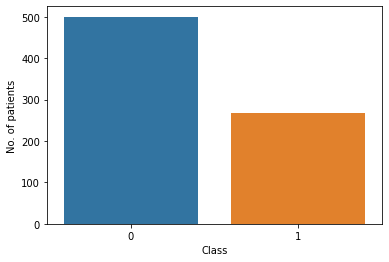

In [ ]:
sns.countplot('Outcome', data = dataset)
plt.xlabel("Class")
plt.ylabel("No. of patients")
plt.show()

As you can see from the plot above, our dataset is quite skewed. The number of patients that do not have diabetes (0) is double the number of patients that have diabetes (1). This indicates that accuracy alone is not a dependable metric to measure the model's performance. Can you answer why? (Hint: compute the accuracy when our model predicts 0 only.)

We can use metrics such as confusion matrix, precision, recall and F1 score in conjunction with accuracy to better evaluate the performance of our model.

## Confusion Matrix

A confusion matrix is a 2d array as shown below. The rows of the matrix represent the instances of the true classes, while the columns represent the instances of predicted classes (or vice versa). That is to say, given a confusion matrix $C$, the entry $c_{i,j}$ is the number of observations known to belong to class $i$ but predicted to be in class $j$.

<figure align="center">
<!-- <img src="https://drive.google.com/uc?export=view&id=1PlxTya5VwsI0kAzhYCbGyrRS1NyN6jj9" alt="Confusion Matrix" height = "300"/> -->
<img src="https://i.postimg.cc/SsP62Cs4/image.png" alt="Confusion Matrix" height = "300"/>
</figure>

**TN (True Negative)** is the number of examples that our classifier predicted as negative $(\hat{y} = 0)$ and are actually negative $(y = 0)$.

**FN (False Negative)** is the number of examples that our classifier predicted as negative $(\hat{y} = 0)$ but are actually positive $(y = 1)$.

**TP (True Positive)** is the number of examples that our classifier predicted as positive $(\hat{y} = 1)$ and are actually positive $(y = 1)$.

**FP (False Positive)** is the number of examples that our classifier predicted as positive $(\hat{y} = 1)$ but are actually negative $(y = 0)$.

FP and FN are also called **Type I** and **Type II** error respectively. The diagonal of the confusion matrix contains the TN and TP. These are the values that the classifier got right. So greater the values in the diagonal, better the classifier's performance.

We can use the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to compute the confusion matrix. The information provided by the confusion matrix is used for the computation of precision and recall.

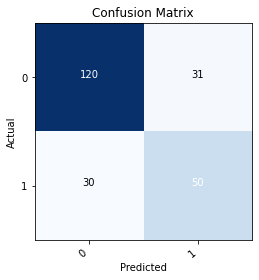

In [ ]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

labels = y_test.unique()
matrix = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)

fig,ax = plt.subplots(figsize=(12,4))
ax.imshow(matrix, cmap="Blues")
t_hold = (matrix.max() - matrix.min()) / 2.
for row,col in itertools.product(range(len(labels)), range(len(labels))):
    color = "white" if matrix[row,col] > t_hold else "black"
    ax.text(col, row, matrix[row, col], horizontalalignment="center", color=color)
tick_marks = np.arange(len(labels))
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=40, ha="right")
ax.set_ylabel("Actual")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
plt.show()


We can also use the [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to display the confusion matrix. Notice any difference between `confusion_matrix` and `plot_confusion_matrix`?

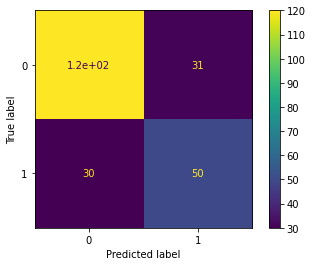

In [ ]:
# Import plot_confusion_matrix from sklearn.metrics
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(logistic_regression,X_test,y_test)
plt.show()

## Precision

Precision measures how often the examples predicted as positive by our classifier are actually positive.  

$$\text{Precision} = \frac{\text{True Positive}}{\text{Total number of positives predicted}} = \frac{TP}{TP+FP}$$




Even though we can compute the precision from the confusion matrix, `sklearn` provides an easier way to compute the precision. We can use the [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to directly compute the precision of our logistic regression classifier.

In [ ]:
# Import precision_score from sklearn.metrics

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(precision)

As you can see, our classifier has a precision of 0.617 which means that among the patients that the classifier predicts as positive only 61.7% are actually positive or have diabetes.

## Recall

Recall measures how often the examples that are actually positive are predicted as positive by our classifier.

$$\text{Recall} =  \frac{\text{True Positive}}{\text{Total number of actual positives}} = \frac{TP}{TP + FN}$$

We can calculate the recall from the confusion matrix as well but here we will use the [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the recall of our classifier.

In [ ]:
# Import recall_score from sklearn.metrics
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(recall)

The classifier has a recall of 0.625 which means that among the patients that actually have diabetes, the classifier can only identify 62.5% of them. Can you think of the consequences?

Hint: Think about the people who have diabetes and don't take any medication as they are incorrectly diagnosed.

## F1 Score

If your classifier needs to have a balance between precision and recall, then you can use the F1 Score. It is calculated as:
$$\text{F1 score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision}  + \text{Recall}}$$

We can use the [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) from [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to compute the F1 score of the model.


In [ ]:
# Import f1_score from sklearn.metrics
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred)
print(f1_score)